In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
df = pd.read_csv("train (2).csv")
df.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8    ...     pixel774  pixel775  pixel776  pixel777  pixel778  \
0       0    ...            0         0         0         0         0   
1       0    ...            0         0         0         0         0   
2       0    ...            0         0         0         0         0   
3       0    ...            0         0         0         0         0   
4       0    ...            0         0         0         0         0   

   pixel779  pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0         0  
1         0         0         0         0         0  
2         0         0         0         0         0  
3         0         0         0         0         0  
4         0         0         0         0         0  

[5 rows x 785 columns]

In [3]:
#Data Understanding, Preparation and EDA 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
df.shape

(42000, 785)

In [5]:
#as u can see there are 785 columns its better to check null values overall 
df.notnull().values.any()

True

In [7]:
#u can see there are no null values
#lets  check duplicates
df.duplicated().values.any()

False

In [6]:
#there are no duplicates
pd.set_option('display.max_columns',None)
#this is in order  to display all columns
df.describe()

label   pixel0   pixel1   pixel2   pixel3   pixel4   pixel5  \
count  42000.000000  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       4.456643      0.0      0.0      0.0      0.0      0.0      0.0   
std        2.887730      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.000000      0.0      0.0      0.0      0.0      0.0      0.0   
25%        2.000000      0.0      0.0      0.0      0.0      0.0      0.0   
50%        4.000000      0.0      0.0      0.0      0.0      0.0      0.0   
75%        7.000000      0.0      0.0      0.0      0.0      0.0      0.0   
max        9.000000      0.0      0.0      0.0      0.0      0.0      0.0   

        pixel6   pixel7   pixel8   pixel9  pixel10  pixel11      pixel12  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.00000   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.00300   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.56812   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.00000   
max        0.0      0.0      0.0      0.0      0.0      0.0    116.00000   

            pixel13       pixel14       pixel15  pixel16  pixel17  pixel18  \
count  42000.000000  42000.000000  42000.000000  42000.0  42000.0  42000.0   
mean       0.011190      0.005143      0.000214      0.0      0.0      0.0   
std        1.626927      1.053972      0.043916      0.0      0.0      0.0   
min        0.000000      0.000000      0.000000      0.0      0.0      0.0   
25%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
50%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
75%        0.000000      0.000000      0.000000      0.0      0.0      0.0   
max      254.000000    216.000000      9.000000      0.0      0.0      0.0   

       pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  pixel25  pixel26  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0  42000.0   
mean       0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
std        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
min        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
25%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
50%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
75%        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
max        0.0      0.0      0.0      0.0      0.0      0.0      0.0      0.0   

       pixel27  pixel28  pixel29  pixel30  pixel31       pixel32  \
count  42000.0  42000.0  42000.0  42000.0  42000.0  42000.000000   
mean       0.0      0.0      0.0      0.0      0.0      0.000381   
std        0.0      0.0      0.0      0.0      0.0      0.078072   
min        0.0      0.0      0.0      0.0      0.0      0.000000   
25%        0.0      0.0      0.0      0.0      0.0      0.000000   
50%        0.0      0.0      0.0      0.0      0.0      0.000000   
75%        0.0      0.0      0.0      0.0      0.0      0.000000   
max        0.0      0.0      0.0      0.0      0.0     16.000000   

            pixel33       pixel34       pixel35       pixel36       pixel37  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.001310      0.010548      0.027262      0.050905      0.066405   
std        0.232634      1.131661      2.310396      3.121847      3.259128   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000   

In [7]:
#get  the value count of each digit
df.label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [8]:
#as the data is huge its important take  few samples ans then split it into train and test
#consider 20% of given data for analysis
hd_wri_digits=df[0:8000]

In [9]:
hd_wri_digits.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  \
0       0       0        0        0        0        0        0        0   
1       0       0        0        0        0        0        0        0   
2       0       0        0        0        0        0        0        0   
3       0       0        0        0        0        0        0        0   
4       0       0        0        0        0        0        0        0   

   pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        

In [10]:
# splitting into X and y
y = hd_wri_digits.pop('label')
X =hd_wri_digits

In [11]:
y.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
X.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0 

In [13]:
#get the value counts of label now
y.value_counts()

1    891
2    838
7    834
3    797
9    795
6    793
0    793
4    773
8    761
5    725
Name: label, dtype: int64

In [14]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6400, 784)
(1600, 784)
(6400,)
(1600,)


In [16]:
y_train.value_counts()

1    708
7    672
2    667
3    644
9    640
4    638
0    630
6    622
8    605
5    574
Name: label, dtype: int64

In [17]:
y_test.value_counts()

1    183
6    171
2    171
0    163
7    162
8    156
9    155
3    153
5    151
4    135
Name: label, dtype: int64

In [18]:
#data has lot 0 pixel value we can use min max scalar
#scale the dataset using min max scalar
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
S_train = scaler.fit_transform(X_train)
S_test  = scaler.fit_transform(X_test)

In [21]:
# Linear  model
from sklearn import svm


linear_svm = svm.SVC(kernel='linear')

# fit
linear_svm.fit(S_train, y_train)

# predict
y_pred = linear_svm.predict(S_test)

In [22]:
# Evaluate the model using confusion matrix 
from sklearn import metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred))

[[161   0   0   0   0   1   0   0   1   0]
 [  1 178   0   1   0   1   0   0   2   0]
 [  1   3 154   2   1   1   2   3   4   0]
 [  1   0   4 137   0   6   1   0   3   1]
 [  0   1   3   0 129   0   1   0   0   1]
 [  2   2   1  11   1 132   1   0   1   0]
 [  2   1   0   0   2   3 163   0   0   0]
 [  3   1   4   1   2   0   0 147   0   4]
 [  0   1   1   8   0  10   0   2 132   2]
 [  1   0   3   1  10   0   0  11   1 128]]


In [23]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred))

accuracy 0.913125


In [24]:
#The linear  model gives 91.13%  accuracy
#class wise accuracy
print(metrics.classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.94      0.99      0.96       163
          1       0.95      0.97      0.96       183
          2       0.91      0.90      0.90       171
          3       0.85      0.90      0.87       153
          4       0.89      0.96      0.92       135
          5       0.86      0.87      0.87       151
          6       0.97      0.95      0.96       171
          7       0.90      0.91      0.90       162
          8       0.92      0.85      0.88       156
          9       0.94      0.83      0.88       155

avg / total       0.91      0.91      0.91      1600



In [25]:
#non linear model
non_linear_svm = svm.SVC(kernel='rbf')

# fit
non_linear_svm.fit(S_train, y_train)

# predict
y_pred_nl = non_linear_svm.predict(S_test)

In [26]:
#get confusion metrics
print(metrics.confusion_matrix(y_true=y_test, y_pred=y_pred_nl))

[[157   0   0   0   1   1   3   0   1   0]
 [  0 178   0   2   0   2   0   0   1   0]
 [  2   3 146   3   2   0   2   7   6   0]
 [  2   0   2 136   0   6   1   3   3   0]
 [  0   0   1   0 124   0   2   0   0   8]
 [  2   5   0  14   0 126   3   0   0   1]
 [  2   0   1   0   3   3 162   0   0   0]
 [  1   3   5   0   2   1   0 147   0   3]
 [  0   1   2   6   0   8   0   1 135   3]
 [  1   1   0   2   6   1   0   7   1 136]]


In [27]:
# accuracy
print("accuracy", metrics.accuracy_score(y_test, y_pred_nl))

accuracy 0.904375


In [28]:
#class wise accuracy
print(metrics.classification_report(y_test, y_pred_nl))

             precision    recall  f1-score   support

          0       0.94      0.96      0.95       163
          1       0.93      0.97      0.95       183
          2       0.93      0.85      0.89       171
          3       0.83      0.89      0.86       153
          4       0.90      0.92      0.91       135
          5       0.85      0.83      0.84       151
          6       0.94      0.95      0.94       171
          7       0.89      0.91      0.90       162
          8       0.92      0.87      0.89       156
          9       0.90      0.88      0.89       155

avg / total       0.90      0.90      0.90      1600



In [29]:
#checking for linear classifier  with  optimum value of gamma and c
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="linear")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(S_train, y_train)    

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 11.0min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [30]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       14.376422      1.022114         5.424910        0.509827       1   
1       16.090720      1.696458         5.358506        0.326163       1   
2       14.894052      0.804850         5.290503        0.420343       1   
3       15.473685      1.034770         5.322104        0.361422      10   
4       14.989057      0.320343         5.157295        0.279723      10   
5       15.098264      0.544314         5.160695        0.259191      10   
6       14.966056      0.850315         5.385708        0.342056     100   
7       16.470342      4.265105         5.113492        0.500500     100   
8       17.753216      5.018056         5.307104        0.385781     100   
9       14.955055      0.779479         5.255901        0.498598    1000   
10      14.730443      0.319026         5.415510        0.504887    1000   
11      14.688240      0.354015         5.273702        0.206495    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.914844   
1        0.001      {'C': 1, 'gamma': 0.001}           0.914844   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.914844   
3         0.01      {'C': 10, 'gamma': 0.01}           0.914844   
4        0.001     {'C': 10, 'gamma': 0.001}           0.914844   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.914844   
6         0.01     {'C': 100, 'gamma': 0.01}           0.914844   
7        0.001    {'C': 100, 'gamma': 0.001}           0.914844   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.914844   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.914844   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.914844   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.914844   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.903125           0.900000           0.906250   
1            0.903125           0.900000           0.906250   
2            0.903125           0.900000           0.906250   
3            0.900781           0.898438           0.903125   
4            0.900781           0.898438           0.903125   
5            0.900781           0.898438           0.903125   
6            0.900781           0.898438           0.903125   
7            0.900781           0.898438           0.903125   
8            0.900781           0.898438           0.903125   
9            0.900781           0.898438           0.903125   
10           0.900781           0.898438           0.903125   
11           0.900781           0.898438           0.903125   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.915625         0.907969        0.006258                1   
1            0.915625         0.907969        0.006258                1   
2            0.915625         0.907969        0.006258                1   
3            0.914062         0.906250        0.006864                4   
4            0.914062         0.906250        0.006864                4   
5            0.914062         0.906250        0.006864                4   
6            0.914062         0.906250        0.006864                4   
7            0.914062         0.906250        0.006864                4   
8            0.914062         0.906250        0.006864                4   
9            0.914062         0.906250        0.006864                4   
10           0.914062         0.906250        0.006864                4   
11           0.914062         0.906250        0.006864                4   

    split0_train_score  split1_train_score  split2_train_score  \
0                  1.0            0.999609                 1.0   
1                  1.0            0.999609                 1.0   
2                  1.0            0.999609                 1.0   
3                  1.0            1.000000                 1.0   
4                

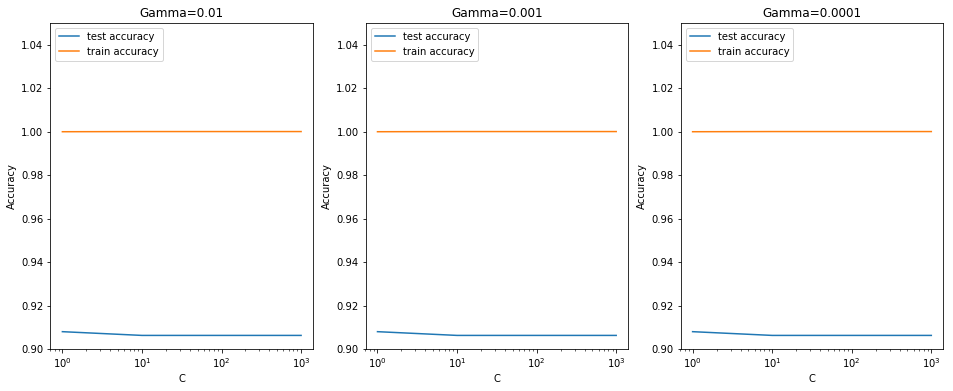

In [31]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.90, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.90, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.90, 1.05])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [32]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.90796875 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


In [33]:
# specify optimal hyperparameters
best_params = {"C": 1, "gamma": 0.01, "kernel":"linear"}

# model
model_l = SVC(C=1, gamma=0.01, kernel="linear")

model_l.fit(S_train, y_train)
y_pred_final_l = model_l.predict(S_test)


In [34]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_final_l))

accuracy 0.913125


In [35]:
#the  acccuracy  is not tht greatly improved
#let  try  in non linear models
#lets try to improve accuracy by getting optimum value of gamma and C
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 4)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(S_train, y_train)                  


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed: 14.5min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 18.4min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [36]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_C  \
0       24.274388      1.110907         7.691640        0.462461       1   
1       40.678926      1.447578        10.407595        0.360734       1   
2       99.287079      1.695279        15.204070        0.729038       1   
3       22.555690      0.978068         7.603235        0.416962      10   
4       21.354821      3.918024         6.941797        0.675993      10   
5       38.582807      1.706255        10.514401        0.477901      10   
6       27.127752      4.349370         6.938997        0.185173     100   
7       15.447283      0.277536         5.762530        0.219598     100   
8       18.218642      0.310095         6.554775        0.396675     100   
9       23.440741      1.962496         8.237871        0.991347    1000   
10      20.228757      4.109859         7.337820        1.173788    1000   
11      16.757158      3.181006         6.007744        1.408875    1000   

   param_gamma                        params  split0_test_score  \
0         0.01       {'C': 1, 'gamma': 0.01}           0.956250   
1        0.001      {'C': 1, 'gamma': 0.001}           0.920312   
2       0.0001     {'C': 1, 'gamma': 0.0001}           0.782813   
3         0.01      {'C': 10, 'gamma': 0.01}           0.962500   
4        0.001     {'C': 10, 'gamma': 0.001}           0.939844   
5       0.0001    {'C': 10, 'gamma': 0.0001}           0.919531   
6         0.01     {'C': 100, 'gamma': 0.01}           0.963281   
7        0.001    {'C': 100, 'gamma': 0.001}           0.938281   
8       0.0001   {'C': 100, 'gamma': 0.0001}           0.940625   
9         0.01    {'C': 1000, 'gamma': 0.01}           0.963281   
10       0.001   {'C': 1000, 'gamma': 0.001}           0.934375   
11      0.0001  {'C': 1000, 'gamma': 0.0001}           0.927344   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.940625           0.935937           0.945312   
1            0.900000           0.892188           0.896875   
2            0.793750           0.779687           0.776563   
3            0.957031           0.947656           0.960938   
4            0.919531           0.913281           0.927344   
5            0.892969           0.890625           0.895312   
6            0.957031           0.947656           0.960156   
7            0.929688           0.922656           0.928125   
8            0.914844           0.903906           0.922656   
9            0.957031           0.947656           0.960156   
10           0.928906           0.914844           0.921875   
11           0.910937           0.906250           0.910156   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  \
0            0.954688         0.946562        0.007869                4   
1            0.908594         0.903594        0.009926               10   
2            0.796094         0.785781        0.007756               12   
3            0.960938         0.957812        0.005390                1   
4            0.941406         0.928281        0.011031                6   
5            0.906250         0.900937        0.010728               11   
6            0.960156         0.957656        0.005376                2   
7            0.928906         0.929531        0.005024                5   
8            0.934375         0.923281        0.013197                8   
9            0.960156         0.957656        0.005376                2   
10           0.927344         0.925469        0.006640                7   
11           0.921875         0.915312        0.007946                9   

    split0_train_score  split1_train_score  split2_train_score  \
0             0.978711            0.977734            0.980273   
1             0.912109            0.915820            0.916797   
2             0.792578            0.802344            0.803125   
3             0.999805            0.999609            0.999805   
4             0.9

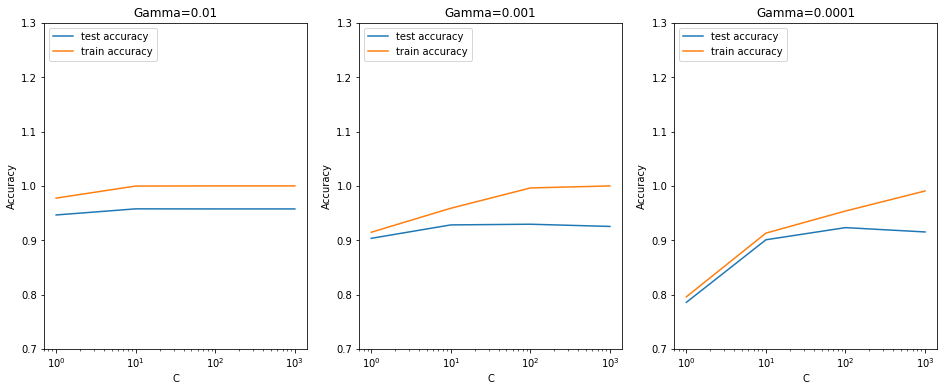

In [37]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.70, 1.3])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.70, 1.3])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.70, 1.3])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


In [38]:
# printing the optimal accuracy score and hyperparameters
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9578125 corresponding to hyperparameters {'C': 10, 'gamma': 0.01}


In [39]:
# specify optimal hyperparameters
best_params = {"C": 10, "gamma": 0.01, "kernel":"rbf"}

# model
model2 = SVC(C=10, gamma=0.01, kernel="rbf")

model2.fit(S_train, y_train)
y_pred_final = model2.predict(S_test)


In [42]:
print("accuracy", metrics.accuracy_score(y_test, y_pred_final))


accuracy 0.959375


In [40]:
#confusion metrics
print(metrics.confusion_matrix(y_test, y_pred_final))

[[162   0   0   0   0   0   0   0   1   0]
 [  0 178   0   2   0   1   0   2   0   0]
 [  1   2 160   3   0   1   0   2   2   0]
 [  1   0   1 145   0   1   1   0   4   0]
 [  1   0   0   0 133   0   1   0   0   0]
 [  0   0   0   2   0 146   2   0   0   1]
 [  2   0   0   0   1   1 167   0   0   0]
 [  1   0   4   0   2   0   0 154   0   1]
 [  0   0   1   2   0   3   0   2 146   2]
 [  1   0   1   1   2   0   0   6   0 144]]


In [41]:
#class wise accuracy
print(metrics.classification_report(y_test, y_pred_final))

             precision    recall  f1-score   support

          0       0.96      0.99      0.98       163
          1       0.99      0.97      0.98       183
          2       0.96      0.94      0.95       171
          3       0.94      0.95      0.94       153
          4       0.96      0.99      0.97       135
          5       0.95      0.97      0.96       151
          6       0.98      0.98      0.98       171
          7       0.93      0.95      0.94       162
          8       0.95      0.94      0.94       156
          9       0.97      0.93      0.95       155

avg / total       0.96      0.96      0.96      1600



In [42]:
#as  we can see when non linear  model is used on data  with hyperparameter it gives  higher accuracy of 95.93% compared to
#linear with accuracy  91.31%
#let us consider remaining data for test data and see the result
test2=df[8000:43000]
test2.head()

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
8000      8       0       0       0       0       0       0       0       0   
8001      6       0       0       0       0       0       0       0       0   
8002      6       0       0       0       0       0       0       0       0   
8003      4       0       0       0       0       0       0       0       0   
8004      8       0       0       0       0       0       0       0       0   

      pixel8  pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  \
8000       0       0        0        0        0        0        0        0   
8001       0       0        0        0        0        0        0        0   
8002       0       0        0        0        0        0        0        0   
8003       0       0        0        0        0        0        0        0   
8004       0       0        0        0        0        0        0        0   

      pixel16  pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0        0        0        0        0        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel24  pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0        0        0        0        0        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel32  pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0       51        0        0        0        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel40  pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0        0       92      228       31        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel48  pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0        0        0        0        0        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  \
8000        0        0        0        0        0        0        0        0   
8001        0        0        0        0        0        0        0        0   
8002        0        0        0        0        0        0        0        0   
8003        0        0        0        0        0        0        0        0   
8004        0        0        0        0        0        0        0        0   

      pixel64  pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  \
8000        0        0        0        0        0        0        0        0   
8001        0   

In [43]:
# splitting into label2 and test_final
label2 = test2.pop('label')
test_final =test2

In [44]:
test2.shape

(34000, 784)

In [45]:
test2_scaled = scaler.fit_transform(test2)

In [47]:
test2_predicted=model2.predict(test2_scaled)

In [48]:
#accuracy on test
print("accuracy", metrics.accuracy_score(label2, test2_predicted))

accuracy 0.9580882352941177


In [49]:
#class wise accuracy
print(metrics.classification_report(label2, test2_predicted))


             precision    recall  f1-score   support

          0       0.97      0.99      0.98      3339
          1       0.98      0.99      0.98      3793
          2       0.95      0.95      0.95      3339
          3       0.95      0.94      0.94      3554
          4       0.95      0.95      0.95      3299
          5       0.95      0.94      0.95      3070
          6       0.97      0.98      0.97      3344
          7       0.96      0.96      0.96      3567
          8       0.96      0.94      0.95      3302
          9       0.95      0.93      0.94      3393

avg / total       0.96      0.96      0.96     34000



In [50]:
#the  final result  on test data  not seen by model
d= {'Actual_label_test': label2,'Predicted_labels_test_model':test2_predicted}
final_dataframe=pd.DataFrame(d)
final_dataframe.head(20)

Actual_label_test  Predicted_labels_test_model
8000                  8                            8
8001                  6                            6
8002                  6                            6
8003                  4                            4
8004                  8                            8
8005                  4                            4
8006                  2                            2
8007                  3                            3
8008                  6                            6
8009                  9                            9
8010                  9                            9
8011                  5                            5
8012                  1                            1
8013                  6                            6
8014                  2                            2
8015                  7                            7
8016                  8                            8
8017                  3                            3
8018                  9                            9
8019                  2                            2

LINEAR  ACCURACY=90.79%, NON_LINEAR ACCURACY =95.8%
WE CAN CONCLUDE ON THIS DATA (RBF) THAT IS NON LINEAR KERNEL IS SUITABLE

In [51]:
#for  kaggle
# reading the dataset
df_test = pd.read_csv("SVM_test.csv")
df_test.head()

pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel9  pixel10  pixel11  pixel12  pixel13  pixel14  pixel15  pixel16  \
0       0        0        0        0        0        0        0        0   
1       0        0        0        0        0        0        0        0   
2       0        0        0        0        0        0        0        0   
3       0        0        0        0        0        0        0        0   
4       0        0        0        0        0        0        0        0   

   pixel17  pixel18  pixel19  pixel20  pixel21  pixel22  pixel23  pixel24  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel25  pixel26  pixel27  pixel28  pixel29  pixel30  pixel31  pixel32  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel33  pixel34  pixel35  pixel36  pixel37  pixel38  pixel39  pixel40  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel41  pixel42  pixel43  pixel44  pixel45  pixel46  pixel47  pixel48  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel49  pixel50  pixel51  pixel52  pixel53  pixel54  pixel55  pixel56  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel57  pixel58  pixel59  pixel60  pixel61  pixel62  pixel63  pixel64  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0   
3        0        0        0        0        0        0        0        0   
4        0        0        0        0        0        0        0        0   

   pixel65  pixel66  pixel67  pixel68  pixel69  pixel70  pixel71  pixel72  \
0        0        0        0        0        0        0        0        0   
1        0        0        0        0        0        0        0        0   
2        0        0        0        0        0        0        0        0 

In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [53]:
df_test.shape

(28000, 784)

In [54]:
df_test.notnull().values.any()

True

In [55]:
df_test.duplicated().values.any()

False

In [56]:
df_test_scaled = scaler.fit_transform(df_test)

In [57]:
df_test_predicted=model2.predict(df_test_scaled)

In [58]:
df_test_predicted.shape

(28000,)

In [69]:
imageIds = list(range(1,28001))


In [78]:

final_submission = pd.DataFrame({ 'ImageId': range(1, 28001), 'Label': df_test_predicted })
final_submission.to_csv("digit_label.csv", index=False)